In [10]:
import cv2
import numpy as np
import imutils
import matplotlib.pyplot as plt

In [2]:
def img_show(title='image', img=None, figsize=(8 ,5)):
    plt.figure(figsize=figsize)

    if type(img) == list:
        if type(title) == list:
            titles = title
        else:
            titles = []

            for i in range(len(img)):
                titles.append(title)

        for i in range(len(img)):
            if len(img[i].shape) <= 2:
                rgbImg = cv2.cvtColor(img[i], cv2.COLOR_GRAY2RGB)
            else:
                rgbImg = cv2.cvtColor(img[i], cv2.COLOR_BGR2RGB)

            plt.subplot(1, len(img), i + 1), plt.imshow(rgbImg)
            plt.title(titles[i])
            plt.xticks([]), plt.yticks([])

        plt.show()
    else:
        if len(img.shape) < 3:
            rgbImg = cv2.cvtColor(img, cv2.COLOR_GRAY2RGB)
        else:
            rgbImg = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

        plt.imshow(rgbImg)
        plt.title(title)
        plt.xticks([]), plt.yticks([])
        plt.show()

In [3]:
cv2_image = cv2.imread('asset/images/test_image.jpg', cv2.IMREAD_COLOR)

OpenCV로 이미지를 이동하려면 먼저 affine transformation matrix 이라고 하는 2 x 3 행렬을 정의해야 합니다.  
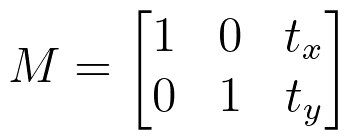

이 행렬은 이미지가 왼쪽 또는 오른쪽으로 몇 픽셀을 이동될 것인지, 또는 이미지를 위 또는 아래로 몇 픽셀이 이동할 것인지 정의합니다.
> 음수 t_{x} 값은 이미지를 왼쪽 으로 이동  
> 양수 t_{x} 값은 이미지를 오른쪽 으로 이동  
> 음수 t_{y} 값은 이미지 를 위로 이동  
> 양수 t_{y} 값은 이미지 를 아래로 이동  

이미지를 오른쪽으로 shiftX 픽셀, 아래로 shiftY 픽셀 이동한다고 가정해 보겠습니다. 변환 행렬은 다음과 같습니다(NumPy 배열로 구현됨).
```
M = np.float32([[1, 0, shiftX], 
                [0, 1, shiftY]])
```
이제 이미지를 왼쪽으로 25픽셀, 위로 50픽셀 이동하려는 경우 변환 행렬은 다음과 같습니다.
```
M = np.float32([[1, 0, 25], 
                [0, 1, 50]])
```

마지막으로 이미지를 왼쪽으로 30픽셀, 아래로 12픽셀 변환한다고 가정해 보겠습니다.
```
M = np.float32([[1, 0, -30], 
                [0, 1, 12]])
```

## Shift

### 이미지를 오른쪽으로 25픽셀, 아래로 50픽셀 이동

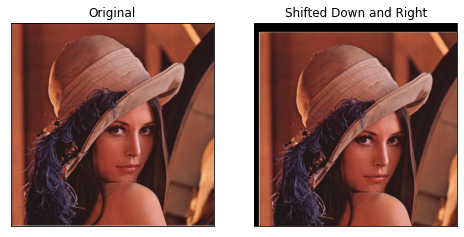

In [6]:
M = np.float32([[1, 0, 25], 
                [0, 1, 50]])
shifted = cv2.warpAffine(cv2_image, M, (cv2_image.shape[1], cv2_image.shape[0]))
img_show(["Original", "Shifted Down and Right"], [cv2_image, shifted])

### 이미지를 왼쪽으로 50픽셀, 위로 90픽셀 이동

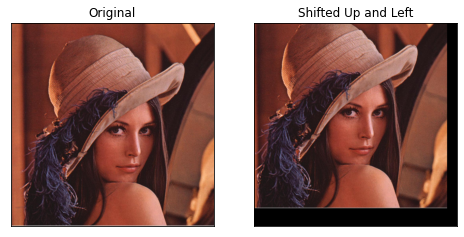

In [45]:
M = np.float32([[1, 0, -50], [0, 1, -90]])
shifted = cv2.warpAffine(cv2_image, M, (cv2_image.shape[1], cv2_image.shape[0]))
img_show(["Original", "Shifted Up and Left"], [cv2_image, shifted])

그러나 변환 행렬을 수동으로 구성하고 ```cv2.warpAffine```메서드를 호출하는 것은 약간의 노력이 필요하며 코드를 복잡하게 만듭니다.
imutils를 이용하면 간편하게 이미지를 이동 할 수 있습니다.

### imutils를 이용하여 이미지를 100픽셀 아래로 이동

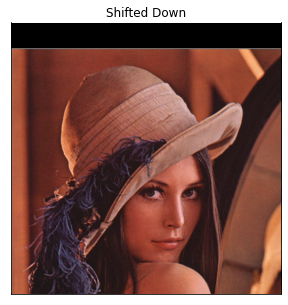

In [13]:
# use the imutils helper function to translate the image 100 pixels
# down in a single function call
shifted = imutils.translate(cv2_image, 0, 100)
img_show("Shifted Down", shifted)

## 이미지 회전 (Rotate)
이미지를 특정 각도로 회전하는 방법에 대해 알아보겠습니다.  
이미지를 회전할 때에는 회전할 지점을 지정해야 합니다. 대부분의 경우는 이미지의 중심을 기준으로 회전을 하지만 임의의 지점을 지정할 수도 있습니다.

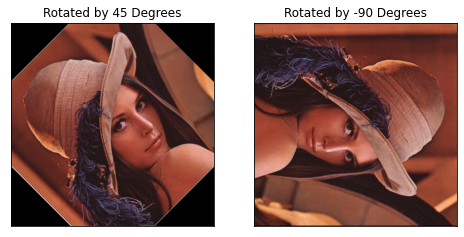

In [18]:
# 이미지의 크기를 잡고 이미지의 중심을 계산합니다.
(h, w) = cv2_image.shape[:2]
(cX, cY) = (w // 2, h // 2)

# 이미지의 중심을 중심으로 이미지를 45도 회전합니다.
M = cv2.getRotationMatrix2D((cX, cY), 45, 1.0)
rotated_45 = cv2.warpAffine(cv2_image, M, (w, h))

# 이미지를 중심으로 -90도 회전
M = cv2.getRotationMatrix2D((cX, cY), -90, 1.0)
rotated_90 = cv2.warpAffine(cv2_image, M, (w, h))

img_show(["Rotated by 45 Degrees", "Rotated by -90 Degrees"], [rotated_45, rotated_90])

이미지를 이동 할 때 행렬을 정의했던 것처럼 이미지를 회전 시에도 행렬을 정의하여 이용 할 수 있습니다.  
NumPy를 사용하여 수동으로 행렬을 구성하는 대신 ```cv2.getRotationMatrix2D```메서드를 사용합니다.

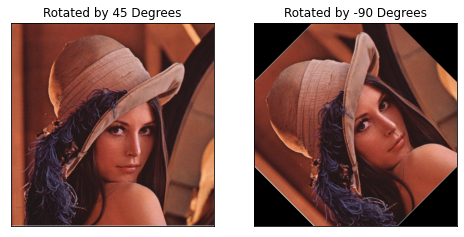

In [46]:
img_show(["Rotated by 45 Degrees", "Rotated by -90 Degrees"], [cv2_image, rotated_45])

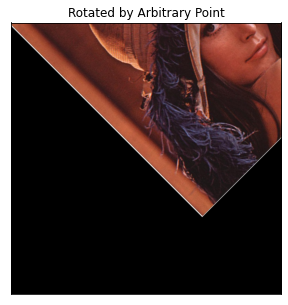

In [30]:
# 첫번째 인수는 이미지를 회전하는 지점입니다(이 경우 이미지의 중심 cX과 위치 cY)
# 두번째 인수는 각도 입니다.
# 세번째 인수는 이미지 크기입니다. (예를들어 1.0 이면 원본사이즈, 2.0 이면 이미지 크기가 두배가 됩니다.)
M = cv2.getRotationMatrix2D((10, 10), 45, 1.0)
rotated = cv2.warpAffine(cv2_image, M, (w, h))
img_show("Rotated by Arbitrary Point", rotated)

imutils 함수를 사용하여 이미지를 180도 회전합니다.

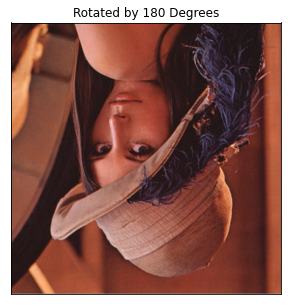

In [41]:
rotated = imutils.rotate(cv2_image, 180)
img_show("Rotated by 180 Degrees", rotated)

```imutils.rotate_bound```을 사용하면 회전 시 이미지 전체가 그안에 맞 도록 이미지 배열을 자동으로 확장합니다.

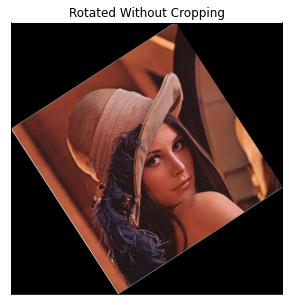

In [42]:
rotated = imutils.rotate_bound(cv2_image, -33)
img_show("Rotated Without Cropping", rotated)

## 이미지 상하, 좌우 대칭 (Flip)
x축 또는 y축을 가로질러 이미지를 뒤집는 방법을 소개하겠습니다.  
다시말하자면 이미지를 수평 또는 수직을 기준으로 미러링 이미지로 변환하는 것입니다.  
Flip은 이미지 데이터를 부풀리기 위해서 사용 할 수도 있습니다.

[INFO] flipping image horizontally...


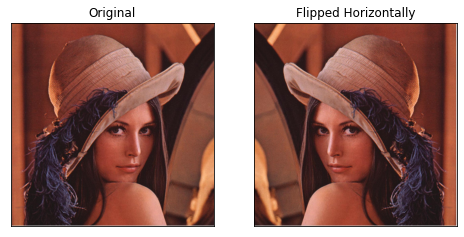

In [35]:
# 이미지를 가로로 뒤집기
print("[INFO] flipping image horizontally...")
flipped = cv2.flip(cv2_image, 1)
img_show(["Original", "Flipped Horizontally"], [cv2_image, flipped])

[INFO] flipping image vertically...


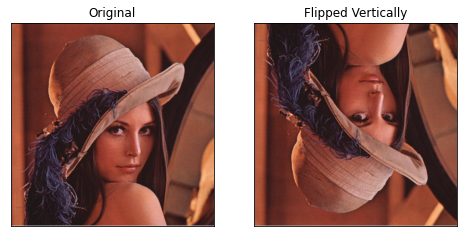

In [37]:
# 이미지를 세로로 뒤집기
print("[INFO] flipping image vertically...")
flipped = cv2.flip(cv2_image, 0)
img_show(["Original", "Flipped Vertically"], [cv2_image, flipped])

[INFO] flipping image horizontally and vertically...


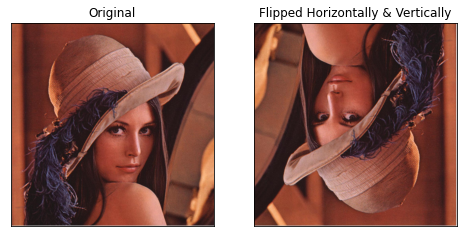

In [38]:
# 두 축을 따라 이미지를 뒤집습니다.
print("[INFO] flipping image horizontally and vertically...")
flipped = cv2.flip(cv2_image, -1)
img_show(["Original", "Flipped Horizontally & Vertically"], [cv2_image, flipped])